In [1]:
import pandas as pd
import numpy as np
!pip3 install yfinance
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 10,5

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from datetime import datetime , timedelta

     |████████████████████████████████| 6.3MB 14.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=59e9e36165f4446e388e4be2a6609eaf6e0e1c2623f43f9e427cfa2e851a9bea
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
date = "2021-04-21"
testing_data_width=7
today = datetime.now()
d = timedelta(days = testing_data_width)
testing_end = today - d
#print(testing_end)
df1 = yf.download("MSFT", start="2020-12-30", end=date , period = '1d')
df2= yf.download("MSFT", start=date, end=today , period = '1d')
no_of_days=df2.shape[0]
print(df1.shape)
print(df2.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(76, 6)
(10, 6)


In [3]:
print(df2.dtypes)
df2.head()

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-21,258.940002,260.679993,257.250000,260.579987,260.579987,24030400
2021-04-22,260.209991,261.779999,255.639999,257.170013,257.170013,25606200
2021-04-23,257.880005,261.510010,257.269989,261.149994,261.149994,21462600
2021-04-26,261.660004,262.440002,260.170013,261.549988,261.549988,19763300
2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200


In [4]:
df1=df1.dropna()
df2=df2.dropna()
x_train = df1[['Open', "High","Low","Volume","Adj Close"]]
y_train = df1[['Close']]
x_test = df2[['Open', "High","Low","Volume","Adj Close"]]
y_test = df2[['Close']]
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
#x_test_scaled=x_test

In [6]:
from sklearn.svm import SVR
svm_clf=SVR(kernel='rbf')
svm_clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred=svm_clf.predict(x_test)

In [9]:
y_test_list = y_test.values.tolist()
y_test_list = np.array(y_test_list)
y_pred_list=y_pred.flatten()
y_test_list=y_test_list.flatten()
print(y_pred_list.shape)
print(y_test_list.shape)

(10,)
(10,)


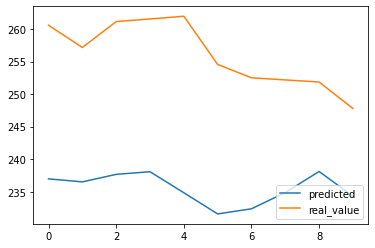

In [10]:
plt.plot(y_pred_list)
plt.plot(y_test_list)
plt.legend(["predicted", "real_value"], loc ="lower right")

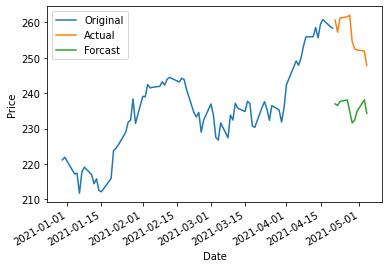

In [11]:
df1["Adj Close"].plot()
df2["Adj Close"].plot()
df2['forcast']=y_pred_list
df2['forcast'].plot()
plt.legend(["Original","Actual","Forcast"])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()